In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

In [4]:
max_features = 20000
max_len = 200
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
x_train = sequence.pad_sequences(x_train,max_len)
x_test = sequence.pad_sequences(x_test,max_len)

In [16]:
def create_model(rnn_type,units = 128):
  model = models.Sequential([
      layers.Embedding(max_features,128),
      layers.SimpleRNN(units,activation = 'tanh') if rnn_type == 'SimpleRNN' else
      layers.LSTM(units,activation = 'tanh') if rnn_type == 'LSTM' else
      layers.GRU(units,activation = 'tanh'),
      layers.Dropout(0.5),
      layers.Dense(1,activation = 'sigmoid')
  ])
  model.compile(optimizer = 'adam',
                    loss = 'binary_crossentropy',
                    metrics = ['accuracy'])
  return model

In [18]:
rnn_types = ["Simple_RNN","LSTM","GRU"]
histories = {}
for rnn in rnn_types:
  print(f"Training {rnn}")
  model = create_model(rnn)
  histories[rnn] = model.fit(x_train,y_train,
                             epochs = 10, batch_size = 64,
                             validation_split = 0.2, verbose = 1)



Training Simple_RNN
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6605 - loss: 0.5830 - val_accuracy: 0.8674 - val_loss: 0.3298
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9136 - loss: 0.2298 - val_accuracy: 0.8772 - val_loss: 0.3049
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9536 - loss: 0.1350 - val_accuracy: 0.8828 - val_loss: 0.3344
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9741 - loss: 0.0757 - val_accuracy: 0.8734 - val_loss: 0.4257
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9884 - loss: 0.0377 - val_accuracy: 0.8682 - val_loss: 0.5768
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9924 - loss: 0.0239 - val_accuracy: 0.8630 - val_loss: 0.6329
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9948 - loss: 0.0180 - val_accuracy: 0.8646 - val_loss: 0.5863
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9964 - los

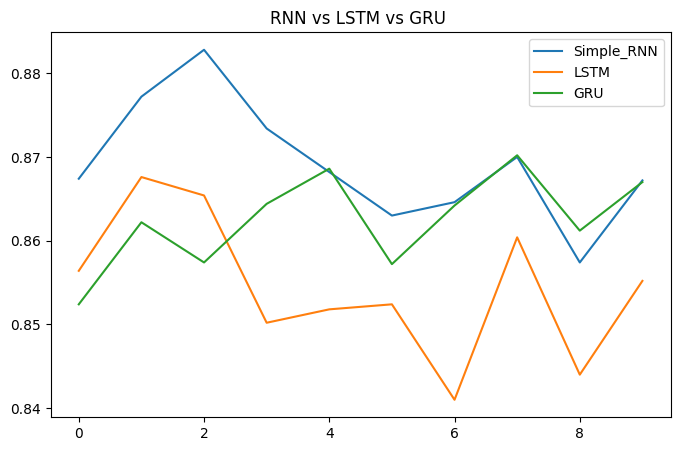

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
for rnn,hist in histories.items():
  plt.plot(hist.history["val_accuracy"],label = rnn)
plt.title("RNN vs LSTM vs GRU ")
plt.legend()
plt.show()